# Feature selection

In [97]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [98]:
import pandas as pd
# silahkan di ganti path nya
df = pd.read_csv('/content/gdrive/MyDrive/Data Science Digital Skola/session 37 batch 4/heart.csv', delimiter=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


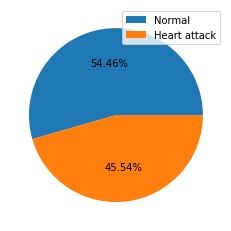

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values
plt.pie(pd.DataFrame(y).value_counts(), autopct='%1.2f%%')
plt.legend(['Normal', 'Heart attack'])
plt.show()

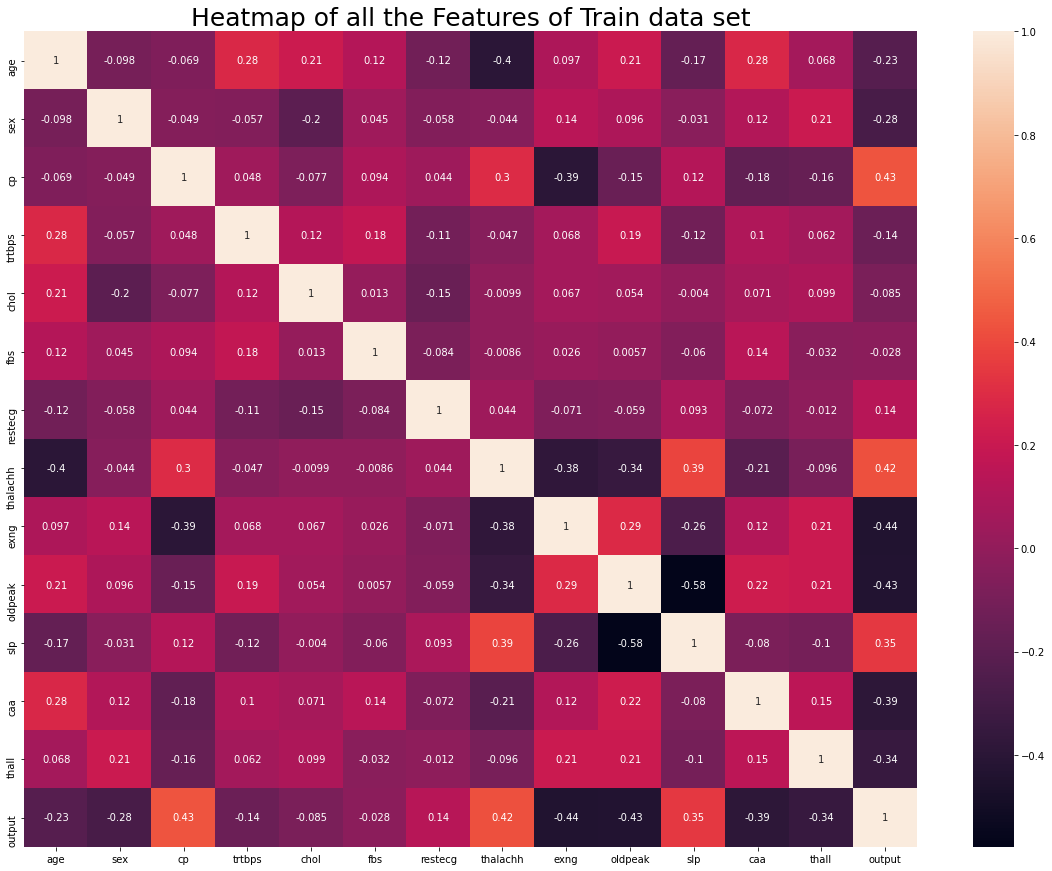

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.concat([df_X, df_y], axis=1)
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);
plt.show()

## Decision tree using original features

Accuracy  0.7362637362637363
Precision  0.7381528046421664
Recall  0.7402439024390244
Confusion matrix  [[32  9]
 [15 35]]


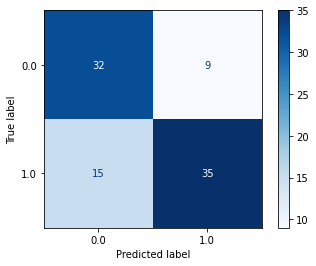

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Filtering method, using ANOVA

Sebelum feature selection  (303, 13)
Setelah feature selection  (303, 8)
Score of features  [16.11669982 25.79219115 69.77227149  6.45816867  2.20298345  0.23694234
  5.77720891 65.1201044  70.95243822 68.55143941 40.90207063 54.5598338
 40.40769615]
Score of features  [7.52480130e-05 6.67869212e-07 2.46971211e-15 1.15460592e-02
 1.38790327e-01 6.26777547e-01 1.68398971e-02 1.69733764e-14
 1.52081384e-15 4.08534639e-15 6.10161062e-10 1.49153874e-12
 7.62487991e-10]


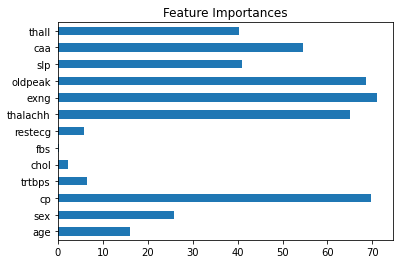

In [107]:
from sklearn.feature_selection import SelectKBest, f_classif

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values

filter = SelectKBest(f_classif, k=8)
X_new = filter.fit_transform(X, y)

print('Sebelum feature selection ', X.shape)
print('Setelah feature selection ', X_new.shape)
print('Score of features ', filter.scores_)
print('Score of features ', filter.pvalues_)

feat_importances = pd.Series(filter.scores_, index=df_X.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()



### DT with feature selection based on filtering method

Accuracy  0.7582417582417582
Precision  0.7577294685990339
Recall  0.7602439024390244
Confusion matrix  [[32  9]
 [13 37]]


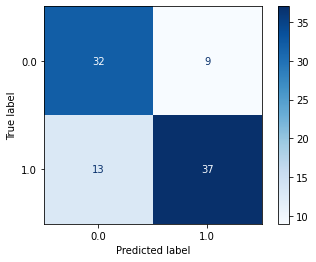

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Wrapper method, using SVM

Sebelum feature selection  (303, 13)
Setelah feature selection  (303, 5)
Score of features  [8 1 2 7 9 5 4 6 1 3 1 1 1]


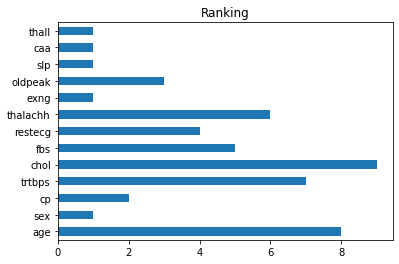

In [109]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values

estimator = SVC(kernel="linear")
wrapper = RFE(estimator, n_features_to_select=5)
X_new = wrapper.fit_transform(X, y)

print('Sebelum feature selection ', X.shape)
print('Setelah feature selection ', X_new.shape)
print('Score of features ', wrapper.ranking_)

feat_importances = pd.Series(wrapper.ranking_, index=df_X.columns)
feat_importances.plot(kind='barh')
plt.title('Ranking')
plt.show()

### DT with feature selection based on wrapper method/RFE

Accuracy  0.7802197802197802
Precision  0.7857142857142857
Recall  0.786829268292683
Confusion matrix  [[35  6]
 [14 36]]


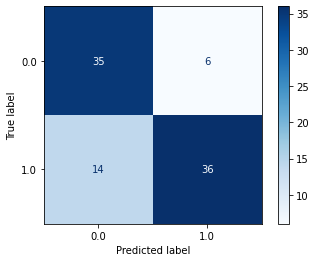

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Embedded method, using ExtraTree

Sebelum feature selection  (303, 13)
Setelah feature selection  (303, 6)
Score of features  [0.07212792 0.05493217 0.14258229 0.05849453 0.06133686 0.01869016
 0.03413154 0.0888259  0.08996794 0.07773777 0.07100678 0.11668836
 0.11347777]
0.07692307692307693


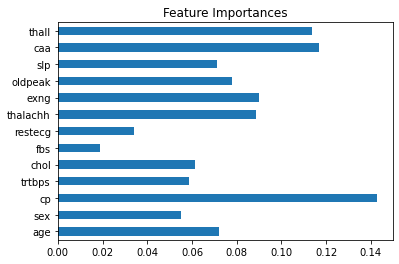

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
embed = SelectFromModel(clf, prefit=True)
X_new = embed.transform(X)

print('Sebelum feature selection ', X.shape)
print('Setelah feature selection ', X_new.shape)
print('Score of features ', clf.feature_importances_)
print(np.mean(clf.feature_importances_))
feat_importances = pd.Series(clf.feature_importances_, index=df_X.columns)
feat_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [112]:
import numpy as np

x = clf.feature_importances_
threshold = np.mean(x)
threshold

0.07692307692307693

### DT with feature selection based on embedded method

Accuracy  0.7692307692307693
Precision  0.7678916827852997
Recall  0.7702439024390244
Confusion matrix  [[32  9]
 [12 38]]


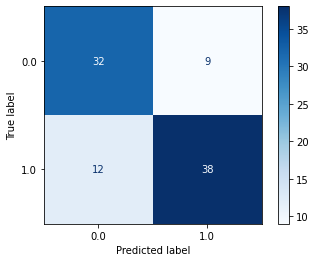

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Feature Extraction

## Data Visualisation with PCA

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=4)
components = pca.fit_transform(X)

principal_df = pd.DataFrame(data = components
             , columns = ['pc1', 'pc2', 'pc3', 'pc4'])
principal_df.head()

,pc1,pc2,pc3,pc4
0,0.624111,2.321270,2.474673,2.676239
1,-0.455988,-0.957351,1.139595,2.426838
2,-1.828805,0.042885,-0.452229,0.406415
3,-1.716006,-0.495337,0.030631,-0.112162
4,-0.371356,0.301156,-2.841069,-0.809042


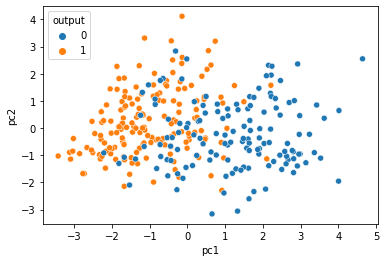

In [115]:
import seaborn as sns
final_df = pd.concat([principal_df, df_y], axis = 1)
sns.scatterplot(x='pc1', y='pc2', hue='output', data=final_df)
plt.show()

In [116]:
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

array([0.21254053, 0.11820708, 0.09406418, 0.09085735])

## To speed up ML model and improve accuracy

Accuracy  0.7582417582417582
Precision  0.7601547388781431
Recall  0.7624390243902439
Confusion matrix  [[33  8]
 [14 36]]


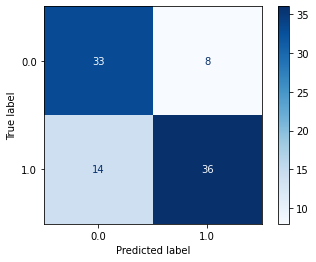

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix


df_X = df.drop(['output'],axis=1)
df_y = df['output']

X = df_X.astype(float).values
y = df_y.astype(float).values
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=4)
X_new = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
